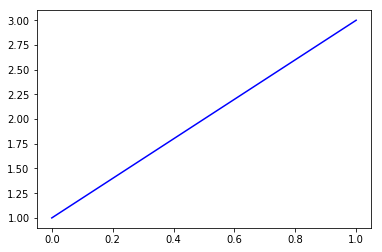

In [1]:
## Step 1: Generate data
import numpy as np
import matplotlib.pyplot as plt
# generate an array of floats between 0 and 1
x = np.linspace(0, 1, num=21)
y = 1 + 2*x
# plot data
plt.plot(x,y,'b')
plt.show()

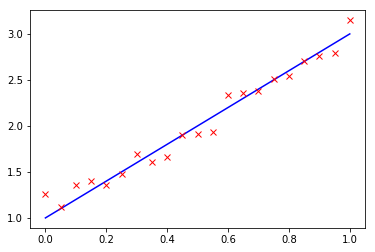

In [3]:
## Step 2: Generate noisy data
mu, sigma = 0, 0.1
# generate random values using normal distribution with mean = 0 and standard deviation = 0.1
noise = np.random.normal(mu, sigma, len(y))
y_noise = y + noise

# plot the original data and the noisy data in the same figure
plt.plot(x,y,'b',x,y_noise,'rx')
plt.show()

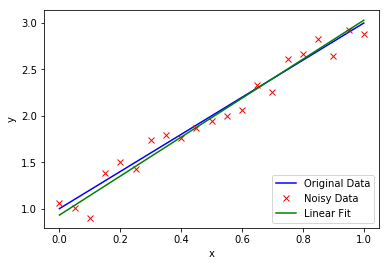

In [24]:
## Step 3: Find parameters
# Here you have to use the provide formulas to calculate parameter theta_0 and theta_1
# Your code goes here
theta_1 = np.cov(x,y_noise)[0][1] / np.var(x)
theta_0 = np.mean(y_noise) - theta_1 * np.mean(x)
z = theta_0 + theta_1 * x

# plot the original line and the fitting linear line here on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'b',x,y_noise,'rx',x,z,'g')
plt.legend(('Original Data', 'Noisy Data', 'Linear Fit'), loc='lower right')
plt.show()

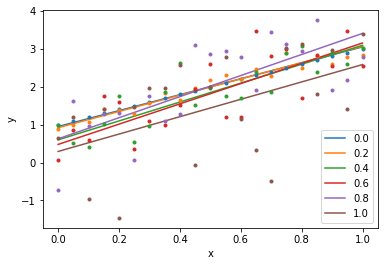

In [27]:
## Step 4: Fit multiple lines
# uncomment the follow line to toggle between the inline mode and the interactive mode
# %pylab osx
plt.subplot(111)
num_sigma = 6
y_noise = np.zeros((num_sigma,len(x)))
z = np.zeros((num_sigma,len(x)))
for indx,sigma in enumerate(np.linspace(0,1,num=num_sigma)):
    # generate the noise
    noise = np.random.normal(mu, sigma, len(x))
    y_noise[indx,:] = noise + y
    
    # calculate theta_1 and theta_0
    theta_1 = np.cov(x,y_noise[indx,:])[0][1] / np.var(x)
    theta_0 = np.mean(y_noise[indx,:]) - theta_1 * np.mean(x)
    z[indx,:] = theta_0 + theta_1*x
    
    # plot the fitting line
    plt.plot(x,z[indx,:])
plt.xlabel('x')
plt.ylabel('y')
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'), loc='lower right')

# reset the color cycle, so that the same color will be used for dots
plt.gca().set_prop_cycle(None)
# plot dots in the same figure
for indx in range(num_sigma):
    plt.plot(x,y_noise[indx,:],'.')
plt.show()

Mean Theta 0:  0.949153387713
Mean Theta 1:  2.10104884306
STD 0:  0.0428069193371
STD 1:  0.0751661329477


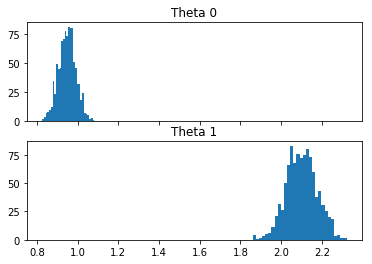

In [18]:
## Step 5: Explore the statistical properties of simple linear regression
mu = 0
sigma = 0.1
n = 1000
params = np.zeros((n,2))
for i in range(n):
    # genrate the noise
    noise = np.random.normal(mu, sigma, len(x))
    y_noise = y + noise
    # your code goes here
    theta_1 = np.cov(x,y_noise)[0][1] / np.var(x)
    theta_0 = np.mean(y_noise) - theta_1 * np.mean(x)
    params[i,0] = theta_0
    params[i,1] = theta_1
theta_bar = np.mean(params,axis=0)
theta_sd = np.std(params,axis=0)
print("Mean Theta 0: ",theta_bar[0])
print("Mean Theta 1: ",theta_bar[1])
print("STD 0: ",theta_sd[0])
print("STD 1: ",theta_sd[1])
f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(params[:,0],bins=30)
axarr[0].set_title('Theta 0')
axarr[1].hist(params[:,1],bins=30)
axarr[1].set_title('Theta 1')
plt.show()